# Описание проекта

## Задача

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с пользователями на основе аналитических данных. Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что пользователь больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.
Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.
Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество анкет пользователей. 

Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.

1. научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
2. сформировать типичные портреты пользователей: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
3. проанализировать основные признаки, наиболее сильно влияющие на отток;
4. сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:

 1) выделить целевые группы клиентов;
 2) предложить меры по снижению оттока;
 3) определить другие особенности взаимодействия с клиентами.

## План выполнения проекта

### Шаг 1. Загрузка данных

### Шаг 2. Исследовательский анализ данных (EDA)

1. Предобработка данных: пропуски, изучить средние значения и стандартные отклонения ( метод describe());
2. Cредние значения признаков в двух группах — тех, кто ушел в отток (0) и тех, кто остался (1);
3. Гистограммы и распределение признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);
4. Матрица корреляций и отобразите её.

### Шаг 3. Построить модель прогнозирования оттока пользователей

1. Построим модель бинарной классификации пользователей, где целевой признак — факт оттока пользователя в следующем месяце:
2. Разбить данные на обучающую и валидационную выборку функцией train_test_split().
3. Обучить модель на train-выборке двумя способами: логистической регрессией, случайным лесом
4. Оценить метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравнить по ним модели. Какая модель показала себя лучше на основании метрик?

### Шаг 4. Сделать кластеризацию пользователей

1. Кластеризация объектов (пользователей):
2. Стандартизировать данные.
3. Построить матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисовать дендрограмму. 
4. Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. 
5. Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?
6. Построить распределения признаков для кластеров. Можно ли что-то заметить по ним?Для каждого полученного кластера посчитать долю оттока. Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

### Шаг 5. Выводы и рекомендации

### Шаг 1. Загрузка данных

In [29]:
pip install pandas-profiling

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [31]:
pip install -e


Usage:   
  /opt/conda/bin/python -m pip install [options] <requirement specifier> [package-index-options] ...
  /opt/conda/bin/python -m pip install [options] -r <requirements file> [package-index-options] ...
  /opt/conda/bin/python -m pip install [options] [-e] <vcs project url> ...
  /opt/conda/bin/python -m pip install [options] [-e] <local project path> ...
  /opt/conda/bin/python -m pip install [options] <archive url/path> ...

-e option requires 1 argument
Note: you may need to restart the kernel to use updated packages.


In [32]:
pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [33]:
from IPython.display import display
import pandas as pd
pd.set_option('display.max_colwidth', 1)
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.metrics import roc_auc_score
import pandas_profiling
from ipywidgets import IntProgress
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

gym_churn = pd.read_csv('/datasets/gym_churn.csv')
display(gym_churn.head())
display(gym_churn.info())



gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0  1       1              1        1              0      6                 
1  0       1              0        0              1      12                
2  0       1              1        0              1      1                 
3  0       1              1        1              1      12                
4  1       1              1        1              1      1                 

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0  1             29   14.227470                     5.0                     
1  1             31   113.202938                    12.0                    
2  0             28   129.448479                    1.0                     
3  1             33   62.669863                     12.0                    
4  0             26   198.362265                    1.0                     

   Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
0  3         0.020398                   0.000000                            
1  7         1.922936                   1.910244                            
2  2         1.859098                   1.736502                            
3  2         3.205633                   3.357215                            
4  3         1.113884                   1.120078                            

   Churn  
0  0      
1  0      
2  0      
3  0      
4  0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

None

In [34]:
pandas_profiling.ProfileReport(gym_churn)

#### Выводы: 

Данные загружены. Всего 4000 строк, 14 колонок. Пропусков нет. Все типы данных корректны.

### Шаг 2. Проведите исследовательский анализ данных (EDA)


Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe());

In [35]:
print(gym_churn.shape)
display(gym_churn.describe())


(4000, 14)


gender  Near_Location      Partner  Promo_friends        Phone  \
count  4000.000000  4000.000000    4000.000000  4000.000000    4000.000000   
mean   0.510250     0.845250       0.486750     0.308500       0.903500      
std    0.499957     0.361711       0.499887     0.461932       0.295313      
min    0.000000     0.000000       0.000000     0.000000       0.000000      
25%    0.000000     1.000000       0.000000     0.000000       1.000000      
50%    1.000000     1.000000       0.000000     0.000000       1.000000      
75%    1.000000     1.000000       1.000000     1.000000       1.000000      
max    1.000000     1.000000       1.000000     1.000000       1.000000      

       Contract_period  Group_visits          Age  \
count  4000.000000      4000.000000   4000.000000   
mean   4.681250         0.412250      29.184250     
std    4.549706         0.492301      3.258367      
min    1.000000         0.000000      18.000000     
25%    1.000000         0.000000      27.000000     
50%    1.000000         0.000000      29.000000     
75%    6.000000         1.000000      31.000000     
max    12.000000        1.000000      41.000000     

       Avg_additional_charges_total  Month_to_end_contract     Lifetime  \
count  4000.000000                   4000.000000            4000.000000   
mean   146.943728                    4.322750               3.724750      
std    96.355602                     4.191297               3.749267      
min    0.148205                      1.000000               0.000000      
25%    68.868830                     1.000000               1.000000      
50%    136.220159                    1.000000               3.000000      
75%    210.949625                    6.000000               5.000000      
max    552.590740                    12.000000              31.000000     

       Avg_class_frequency_total  Avg_class_frequency_current_month  \
count  4000.000000                4000.000000                         
mean   1.879020                   1.767052                            
std    0.972245                   1.052906                            
min    0.000000                   0.000000                            
25%    1.180875                   0.963003                            
50%    1.832768                   1.719574                            
75%    2.536078                   2.510336                            
max    6.023668                   6.146783                            

             Churn  
count  4000.000000  
mean   0.265250     
std    0.441521     
min    0.000000     
25%    0.000000     
50%    0.000000     
75%    1.000000     
max    1.000000

Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby());

In [36]:
# gym_churn_group = gym_churn.groupby('Churn').mean()
display(gym_churn.groupby('Churn').mean().round(2))


gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
Churn                                                                          
0      0.51    0.87           0.53     0.35           0.9    5.75              
1      0.51    0.77           0.36     0.18           0.9    1.73              

       Group_visits    Age  Avg_additional_charges_total  \
Churn                                                      
0      0.46          29.98  158.45                         
1      0.27          26.99  115.08                         

       Month_to_end_contract  Lifetime  Avg_class_frequency_total  \
Churn                                                               
0      5.28                   4.71      2.02                        
1      1.66                   0.99      1.47                        

       Avg_class_frequency_current_month  
Churn                                     
0      2.03                               
1      1.04

#### Вывод NEW:
По средним значениям можно сказать:

1. По гендерному признаку можно сказать, что пол не влияет на тех кто остался и кто ушел. 
2. Near_Location: В отток попали больше пользователей (0.77), которые как ни странно рядом с домом или работой.
3. Partner : партнерская программа на отток почти не повлияла (0.36), и среди тех кто остался партнеров больше(0.53).
4. Promo_friends: в отток попали больше пользователей, которые пришли не по программе Приведи друга (0.18). 
5. Contract_period: в оттоке в среднем продолжительность контракта почти 2 мес(1.73), а среди тех кто остался, в основном те, у кого срок действия почти 6 мес. Т.е. люди чаще уходят, бросают  клуб при коротких контрактах.
6. Group_visits: по групповым визитам больше тех, кто не предпочетает групповые программы. А среди тех, кто остался пользователи больше интересуются групповыми занятиями.
7. Age: Средний возраст примерно одинаковый 27-30 лет. Не влияет на отток .
8. Avg_additional_charges_total: В отток попали больше пользователи, которые  не хотят тратить денег на доп услуги (115), чем те, которые остались(158).
9. Month_to_end_contract: чаще бросают ходить у кого до окончания контракта 1.66 мес,  а остаются те, у кого  больше 5 мес.
10. Lifetime: бросают чаше после 1мес посещения клуба, а остаются те, кто о пришел-4.5мес.
11. Avg_class_frequency_total: больше 1-2 посещений в неделю попадают в отток чаще, чем у кого больше 2 посещений, остаются
12. Avg_class_frequency_current_month: при 1 посещений в неделю попадают в отток чаще, при 2 посещении остаются.



Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);

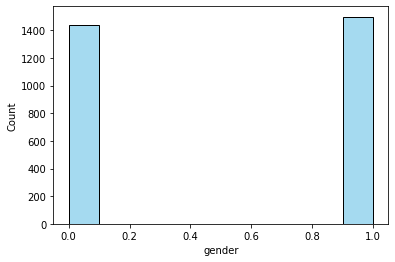

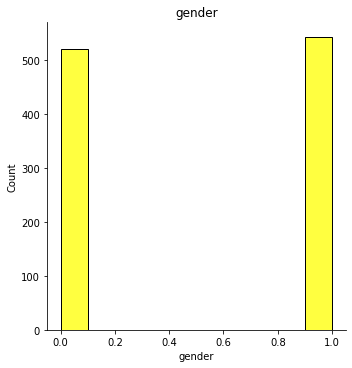

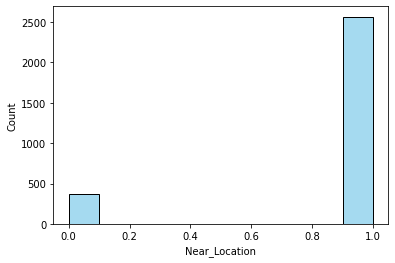

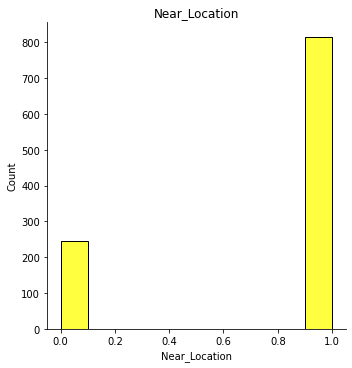

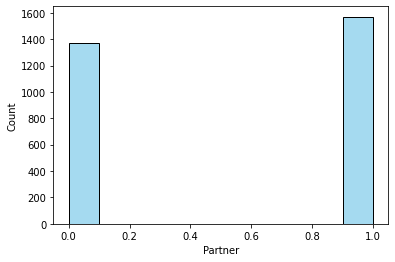

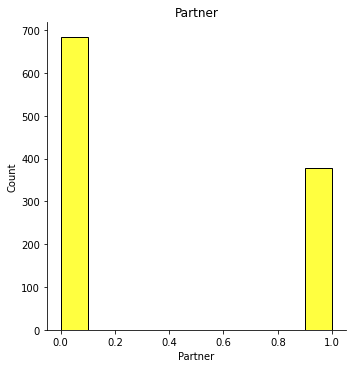

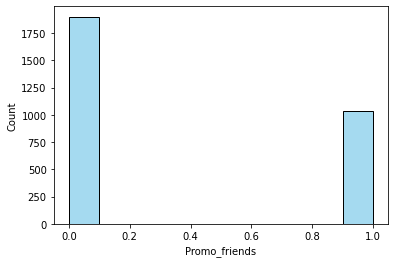

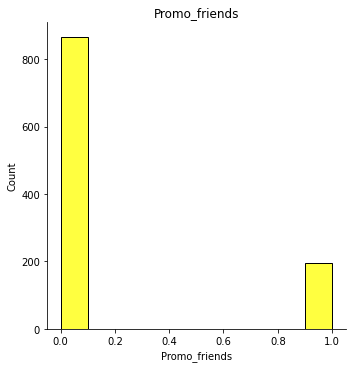

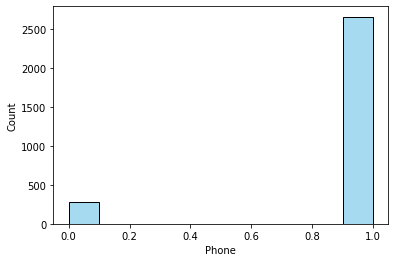

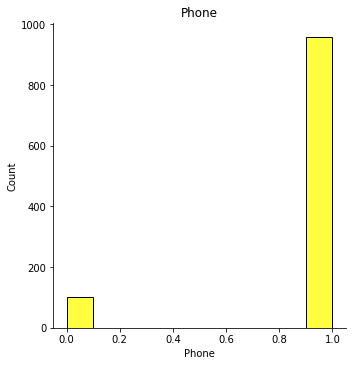

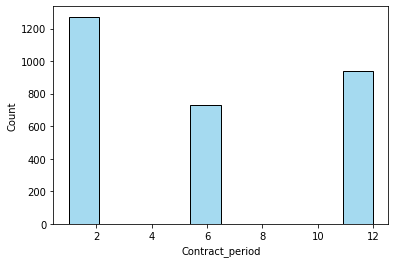

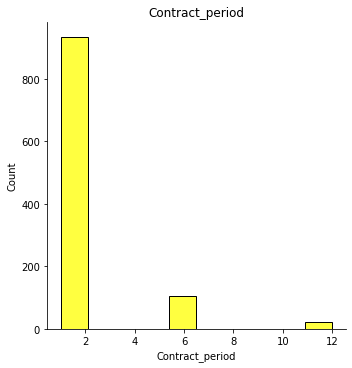

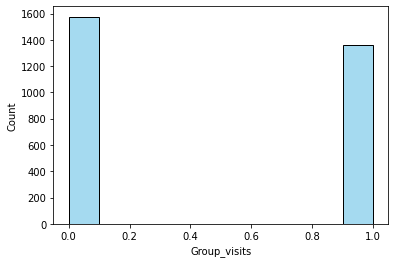

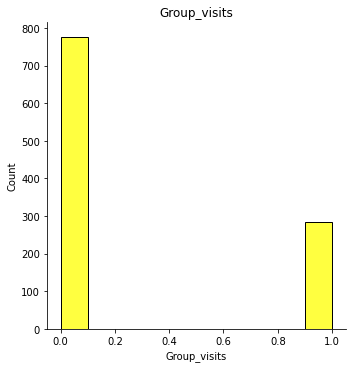

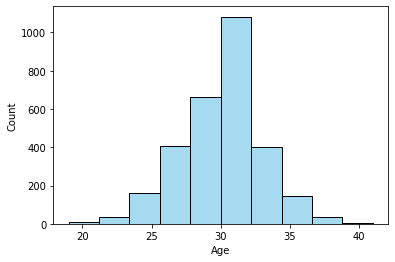

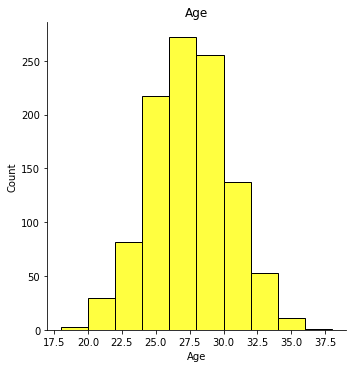

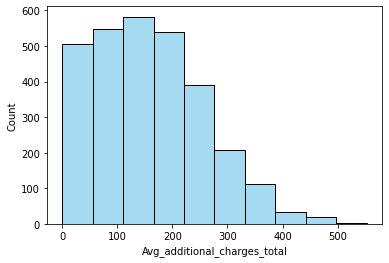

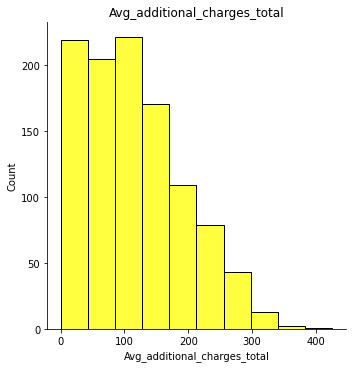

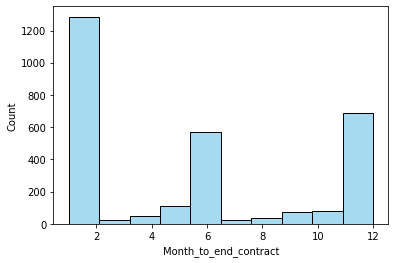

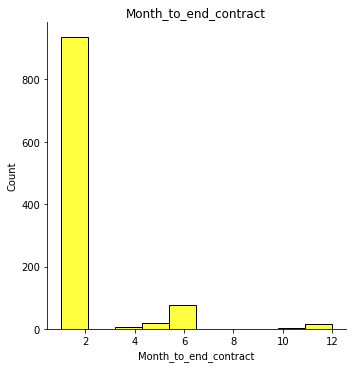

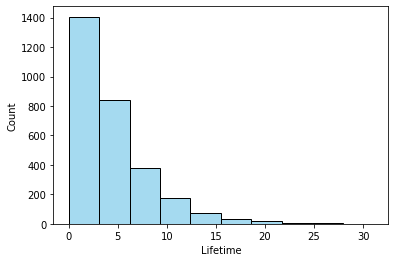

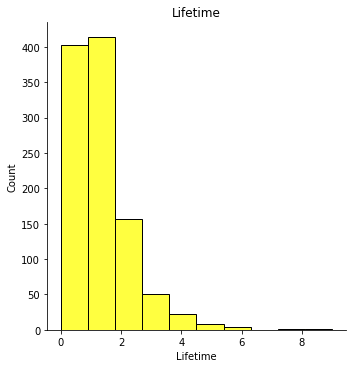

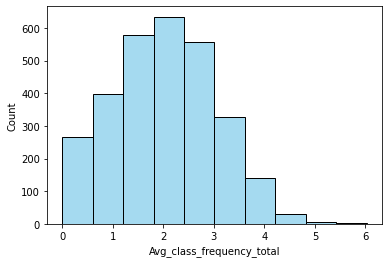

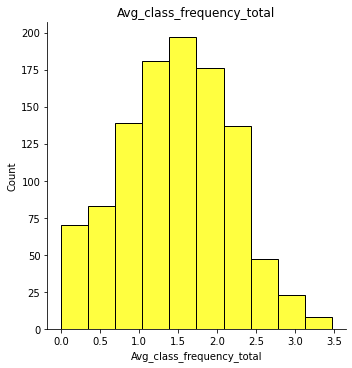

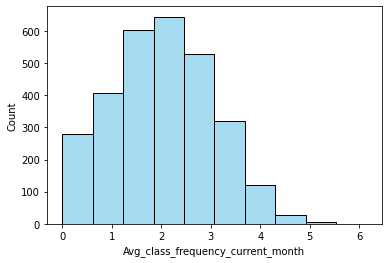

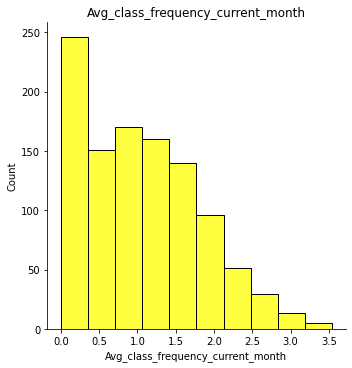

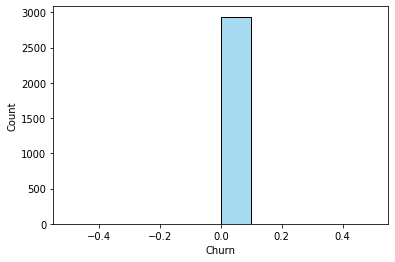

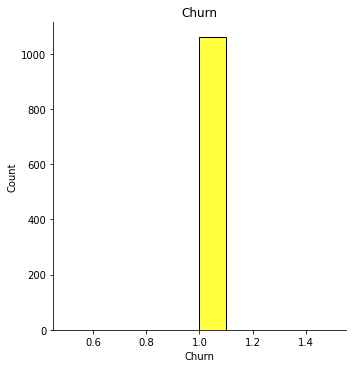

In [40]:
# plt.subplots(figsize=(20,15))
# plots_in_row=3

# for i, col in enumerate(gym_churn.columns.values):
#     sns.distplot(gym_churn.query('Churn == 0')[col], ax = plt.subplot(len(gym_churn.columns.values)//plots_in_row+1, plots_in_row, i+1))
#     sns.distplot(gym_churn.query('Churn == 1')[col], ax = plt.subplot(len(gym_churn.columns.values)//plots_in_row+1, plots_in_row, i+1))
#     plt.title(col)
#     plt.show()


for feature in gym_churn.columns:
    sns.histplot(gym_churn.query('Churn == 0')[feature], bins = 10, color='skyblue', label="Отток")
    sns.displot(gym_churn.query('Churn == 1')[feature], bins = 10, color='yellow', label="Остались")
    plt.title(feature)
    plt.show()



Постройте матрицу корреляций и отобразите её.

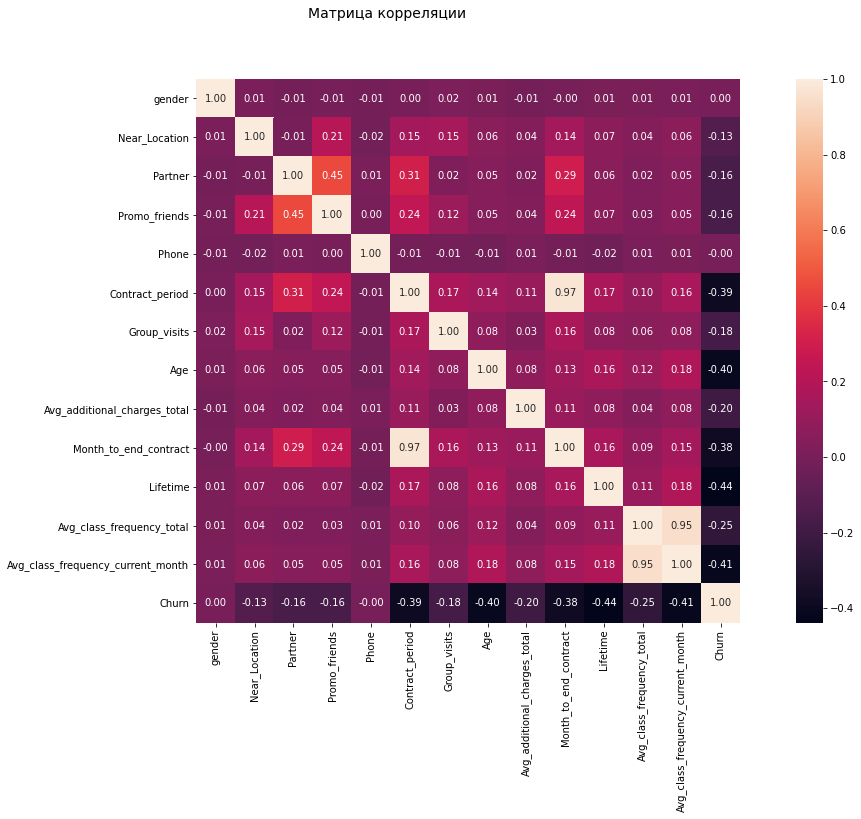

In [42]:
plt.figure(figsize = (20,10))
sns.heatmap(gym_churn.corr(), annot=True, square=True, fmt = '.2f')#ваш код здесь
plt.suptitle("Матрица корреляции", fontsize=14)
plt.show()

#### ВыводыNEW: 

Высокая кореляция между признаками:Avg_class_frequency_total и Avg_class_frequency_current_month, Contract_period и Month_to_end_contract. Самая низкая корреляция  попарно с признаком Gender. Также видна зависимость между Promo_friends и Partner. 

### Шаг 3. Постройте модель прогнозирования оттока пользователей.

Постройте модель бинарной классификации пользователей, где целевой признак — факт оттока пользователя в следующем месяце:

Разбейте данные на обучающую и валидационную выборку функцией train_test_split().

In [43]:
# Сохраните признаки в переменной X, а целевую величину — в переменной y
X = gym_churn.drop('Churn', axis = 1)
y = gym_churn['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Обучите модель на train-выборке двумя способами: логистической регрессией, случайным лесом

Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?

In [44]:
# определим функцию, которая будет выводить наши метрики
def print_all_metrics(y_true, y_pred, y_proba,  title = 'Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))


# задайте алгоритм для нашей модели
lr_model = LogisticRegression(random_state=0,  solver='liblinear')

# обучите модель
lr_model.fit(X_train, y_train)

# воспользуйтесь уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test)
lr_probabilities = lr_model.predict_proba(X_test)[:,1]


print_all_metrics(y_test, lr_predictions, lr_probabilities, title='Метрики для модели логистической регрессии:')


Метрики для модели логистической регрессии:
	Accuracy: 0.93
	Precision: 0.86
	Recall: 0.83


In [45]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state=0)
rf_model.fit(X_train, y_train)

# # воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test)# Ваш код здесь
rf_probabilities = rf_model.predict_proba(X_test)[:,1]# Ваш код здесь
# выведем все метрики
print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Метрики для модели случайного леса:')


Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.82


#### Выводы:

Мы обучили модель двумя способами:логистической регрессией, случайным лесом. Выбираем  модель логистической регрессии, лучшие результаты.
Доля правильных ответов (accuracy)-0.93
Точность (precision)-0.86
Полнота (recall)-0.83


### Шаг 4. Сделайте кластеризацию пользователей

Отложите в сторону столбец с оттоком и проведите кластеризацию объектов (пользователей):

Стандартизируйте данные.

In [46]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
# обязательная стандартизация данных перед работой с алгоритмами
sc = StandardScaler()
X_sc = sc.fit_transform(X)


Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму. Внимание: отрисовка дендрограммы может занять время! На основании полученного графика предположите, какое количество кластеров можно выделить.

In [47]:
print(X_sc[:10])

[[ 0.97970588  0.42788074  1.02686062  1.49716101 -3.05985201  0.28989014
   1.19403206 -0.0565538  -1.37753121  0.16160501 -0.19332863 -1.91191971
  -1.67847198]
 [-1.0207145   0.42788074 -0.973842   -0.66793083  0.32681319  1.60882159
   1.19403206  0.55732732 -0.35021325  1.83194105  0.87368001  0.04517569
   0.1360137 ]
 [-1.0207145   0.42788074  1.02686062 -0.66793083  0.32681319 -0.8092194
  -0.83749845 -0.36349436 -0.1815923  -0.79287273 -0.46008079 -0.02049263
  -0.02901851]
 [-1.0207145   0.42788074  1.02686062  1.49716101  0.32681319  1.60882159
   1.19403206  1.17120844 -0.87472237  1.83194105 -0.46008079  1.36465509
   1.51045005]
 [ 0.97970588  0.42788074  1.02686062  1.49716101  0.32681319 -0.8092194
  -0.83749845 -0.97737548  0.5336998  -0.79287273 -0.19332863 -0.78707638
  -0.61454183]
 [ 0.97970588  0.42788074 -0.973842   -0.66793083  0.32681319 -0.8092194
   1.19403206  1.478149    3.15330097 -0.79287273 -0.19332863  0.76580519
   0.82634551]
 [ 0.97970588  0.42788074

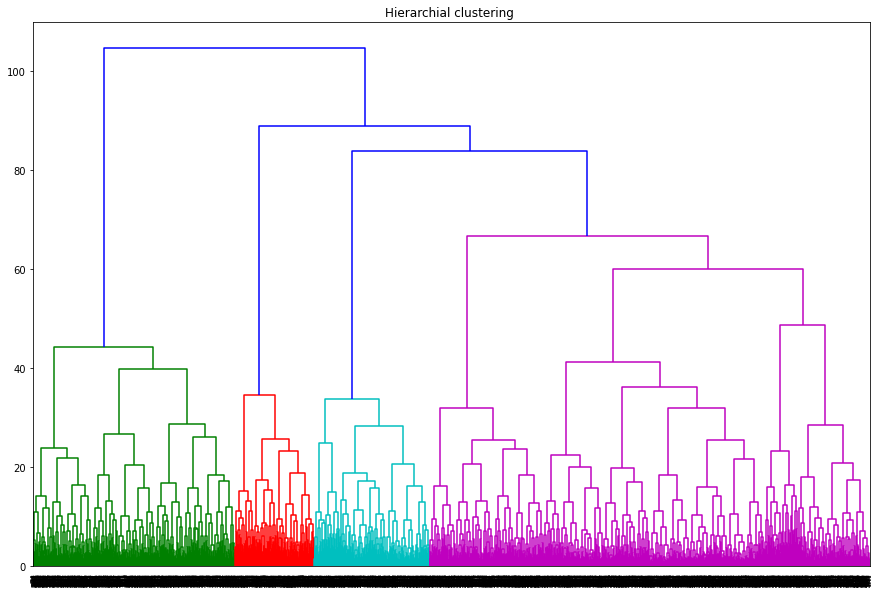

In [48]:
linked = linkage(X_sc, method = 'ward')

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering ')
plt.show()



#### Выводы:

На основании дендограммы можно выделить 4 кластера.


Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. Договоримся за число кластеров принять n=5.

In [49]:
km = KMeans(n_clusters = 5, random_state = 0) # задаём число кластеров, равное 5
labels = km.fit_predict(X_sc) # применяем алгоритм к данным и формируем вектор кластеров
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 4)
labels = km.fit_predict(X_sc)



Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?

In [50]:
# сохраняем метки кластера в поле нашего датасета
gym_churn['cluster_km'] = labels

# выводим статистику по средним значениям наших признаков по кластеру
print(gym_churn.groupby(['cluster_km']).mean().round(2))


            gender  Near_Location  Partner  Promo_friends  Phone  \
cluster_km                                                         
0           0.50    0.96           0.78     0.57           1.0     
1           0.52    0.86           0.47     0.31           0.0     
2           0.50    0.00           0.46     0.08           1.0     
3           0.49    1.00           0.35     0.24           1.0     
4           0.56    0.98           0.36     0.23           1.0     

            Contract_period  Group_visits    Age  \
cluster_km                                         
0           10.88            0.54          29.98   
1           4.79             0.43          29.30   
2           2.35             0.22          28.48   
3           1.95             0.34          28.17   
4           2.67             0.47          30.13   

            Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
cluster_km                                                                  
0   

#### Вывод:
По средним значениям можно сказать:

1. По гендерному признаку можно сказать, что пол в среднем 50/50. 
2. Near_Location: В кластер 2 попали те пользователи, которые не рядом с фитнес центров, а в кластер 3 наоборот. В кластерах 0,1 и 4 близость к центру также имеет значение(0.86, 0.97, 0.96).
3. Partner : В кластер 0 в основном попали пользователи по партнерской программе (0.78), в кластер 1 и 2 в среднем с равными значениями партнеры или нет, а в кластере 3 и 4 (по 0.35) в основном, те кто не является партнером.
4. Promo_friends: В 0 кластере больше всего пользователей (0.57) по акции Приведи друга, в остальных кластерах их намного меньше (<0.31). 
5. Contract_period: В 0 кластере с продолжительностью контракта в среднем 10.88мес, в 1 (4.79 мес), во 2-4 кластере меньше 3 мес.
6. Group_visits: Групповые визиты больше интересны в кластерах 0 (0.54) и 4(0.47).
7. Age: Средний возраст примерно одинаковый 28-30 лет во всех кластерах.
8. Avg_additional_charges_total: Больше затраты на доп.услуги в 0 и 4 кластере, примерно 161. В остальных кластерах меньше 144.
9. Month_to_end_contract: В 0 кластер попали те, у кого почти 10 мес, в 1 кластер -4.48мес, в остальных кластерах меньше 2.5 мес.
10. Lifetime: БОльшая продолжительность пользования у 0 и 4 кластера(4.74-4.9 мес), 
11. Avg_class_frequency_total и Avg_class_frequency_current_month: почти одинаковые средние значения Чаще всего посещают из 4 кластера-2.85раз, меньше всего из 3го кластера-1.01раз.
12. Отток больше всего у 2 и 3 кластеров, а меньше всего у 0 и 4.


Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


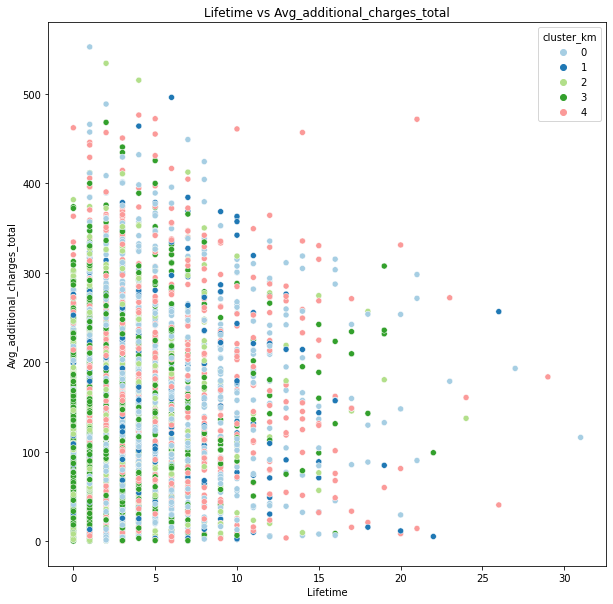

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


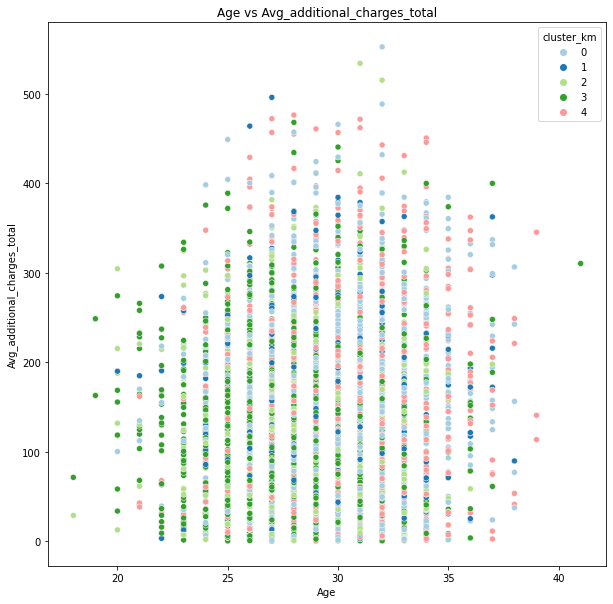

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


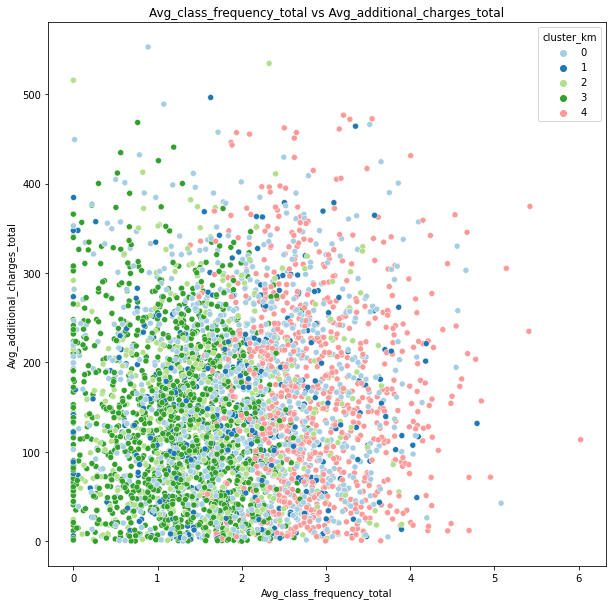

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


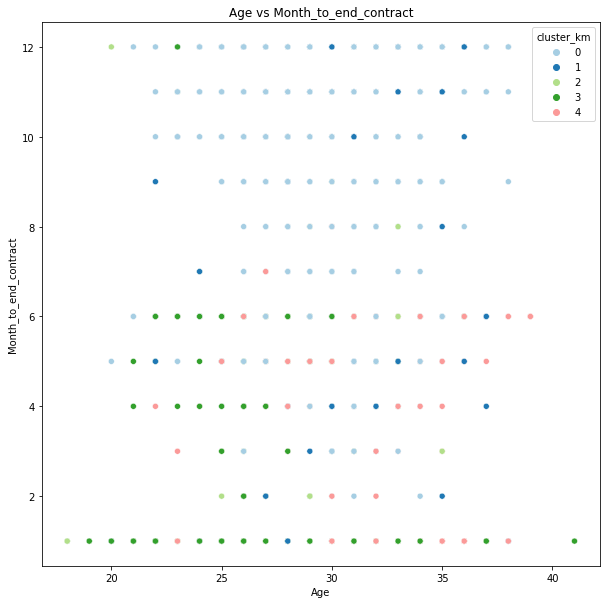

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


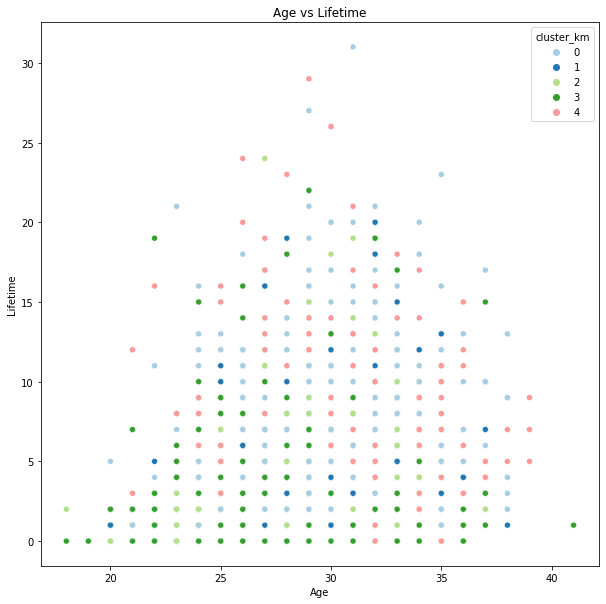

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


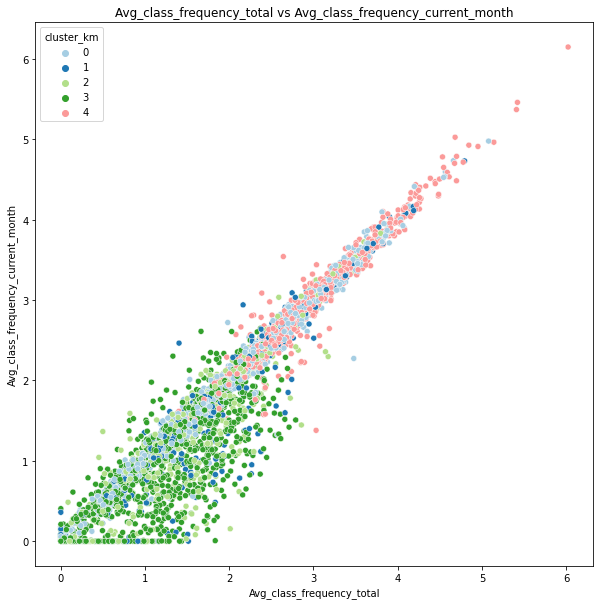

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


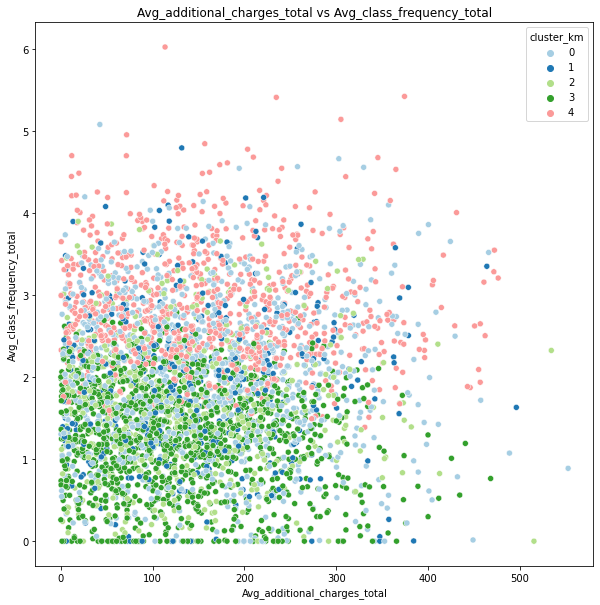

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


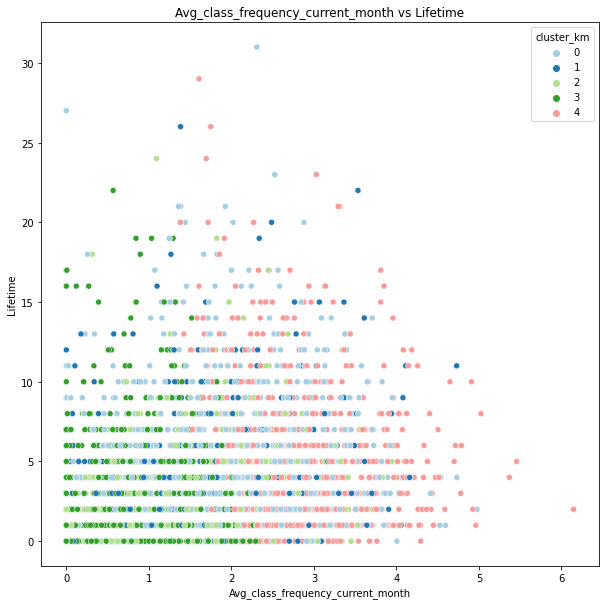

In [51]:
# определим функцию отрисовки графиков попарных признаков  для кластеров
def show_clusters_on_plot(gym_churn, x_name,y_name, cluster_name):
    plt.figure(figsize = (10,10))
    sns.scatterplot(gym_churn[x_name], gym_churn[y_name],
           hue = gym_churn[cluster_name], palette = 'Paired'
       )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

show_clusters_on_plot(gym_churn, 'Lifetime','Avg_additional_charges_total', 'cluster_km')
show_clusters_on_plot(gym_churn, 'Age','Avg_additional_charges_total', 'cluster_km')    
show_clusters_on_plot(gym_churn, 'Avg_class_frequency_total','Avg_additional_charges_total', 'cluster_km')    
show_clusters_on_plot(gym_churn, 'Age','Month_to_end_contract', 'cluster_km')
show_clusters_on_plot(gym_churn, 'Age','Lifetime', 'cluster_km')
show_clusters_on_plot(gym_churn, 'Avg_class_frequency_total','Avg_class_frequency_current_month', 'cluster_km')
show_clusters_on_plot(gym_churn, 'Avg_additional_charges_total','Avg_class_frequency_total', 'cluster_km')
show_clusters_on_plot(gym_churn, 'Avg_class_frequency_current_month','Lifetime', 'cluster_km')



# a = []    
# for x in gym_churn.columns: 
#     for y in gym_churn.columns:
#         if x == y:
#             continue
#         a.append((x,y))
    
# for p in a:
#     show_clusters_on_plot(gym_churn, p[0], p[1], 'cluster_km')



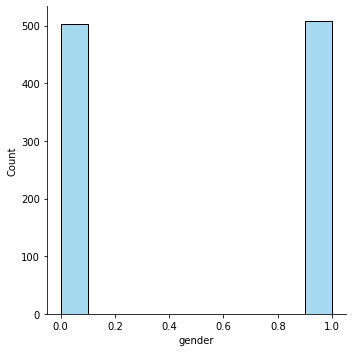

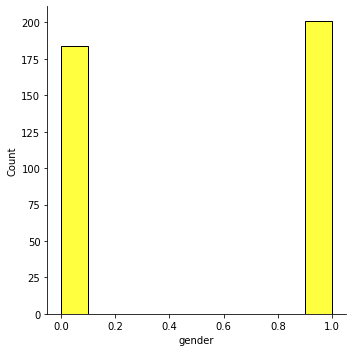

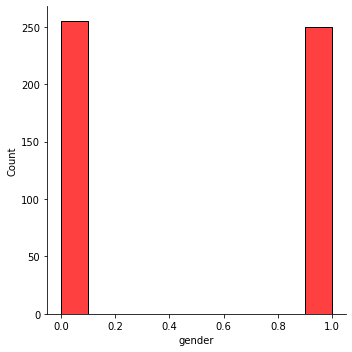

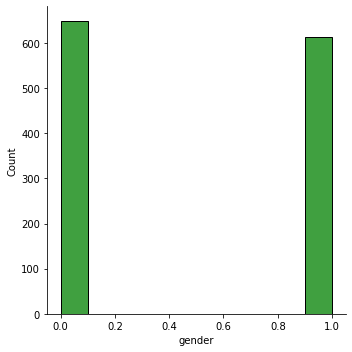

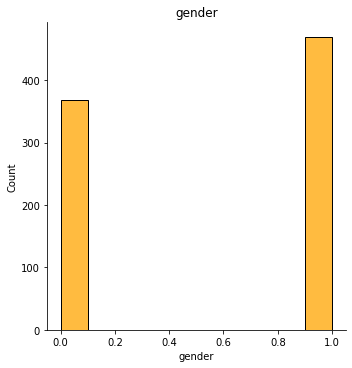

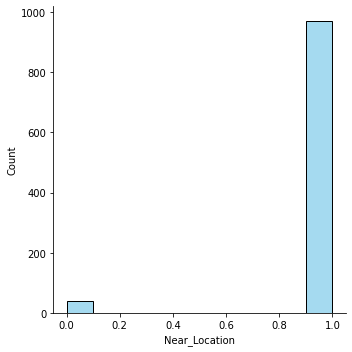

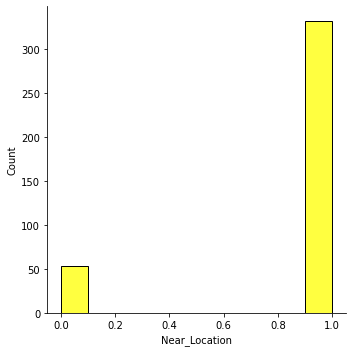

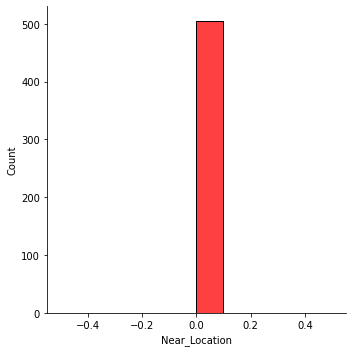

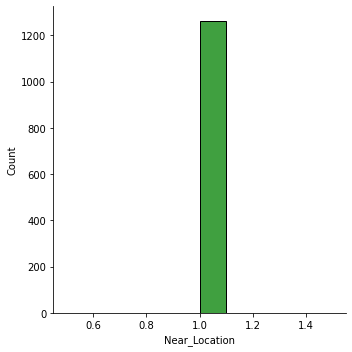

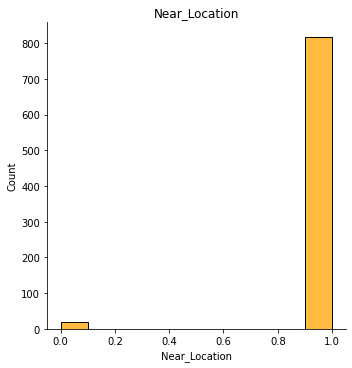

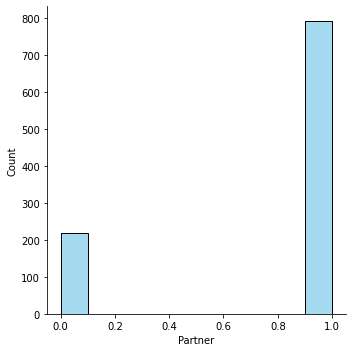

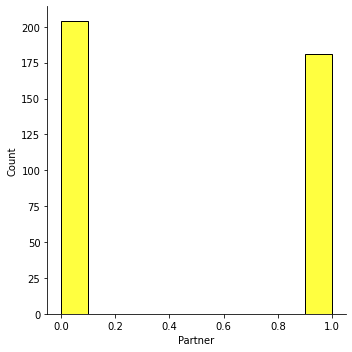

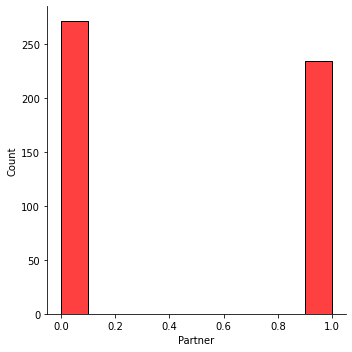

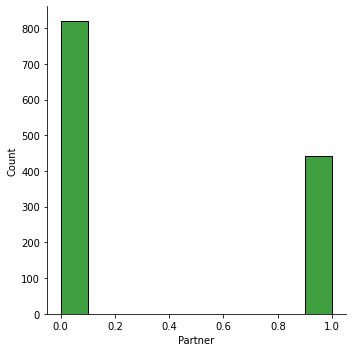

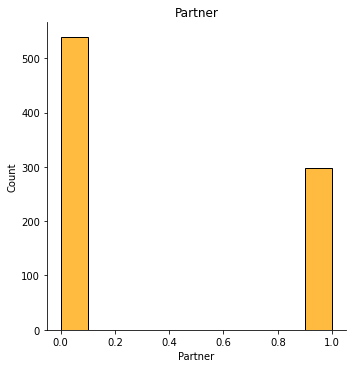

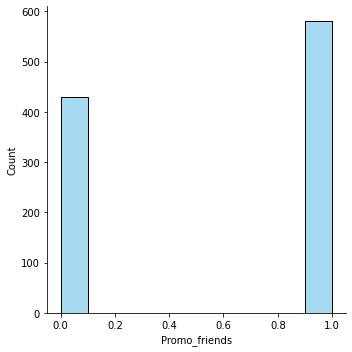

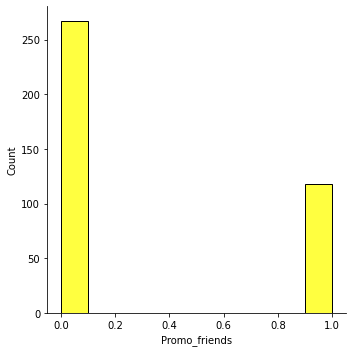

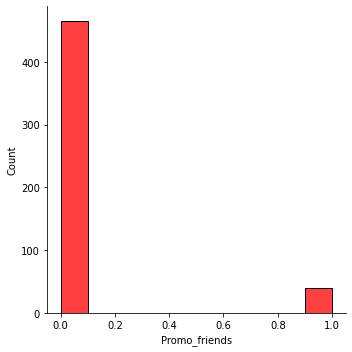

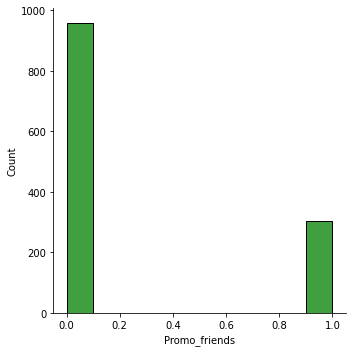

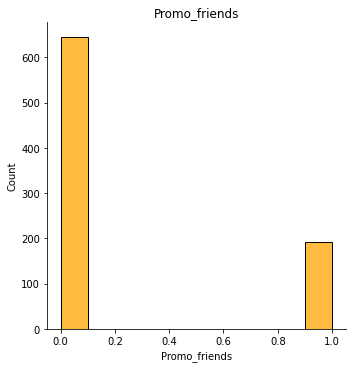

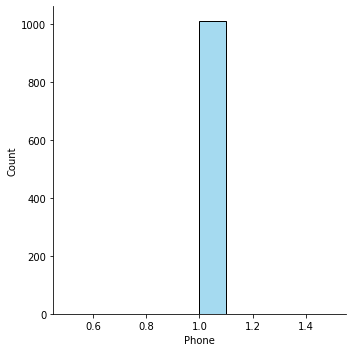

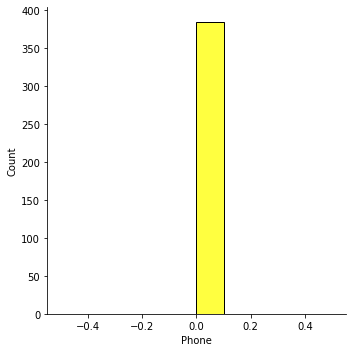

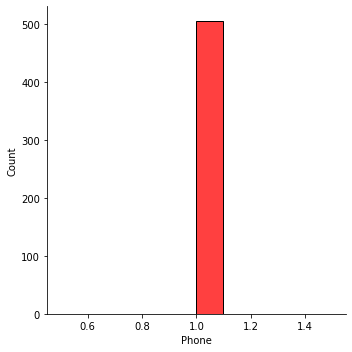

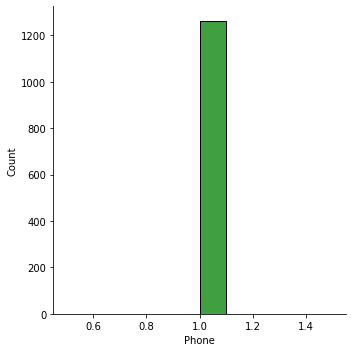

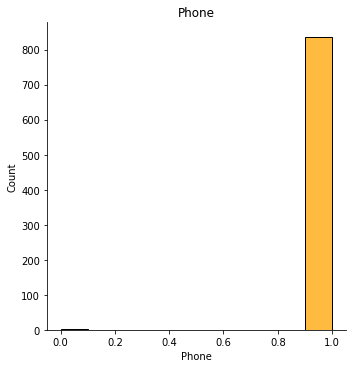

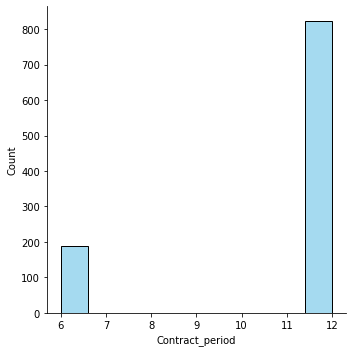

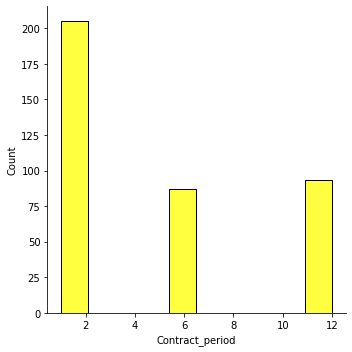

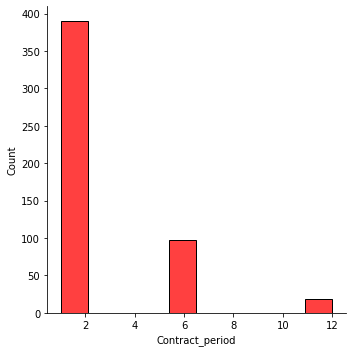

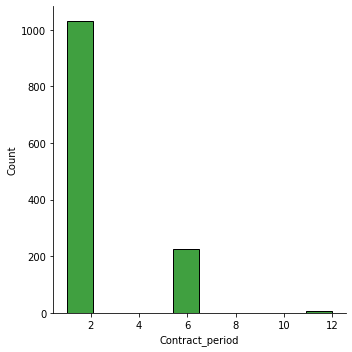

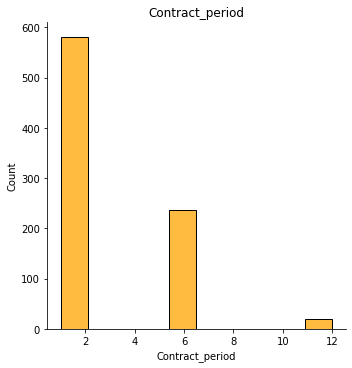

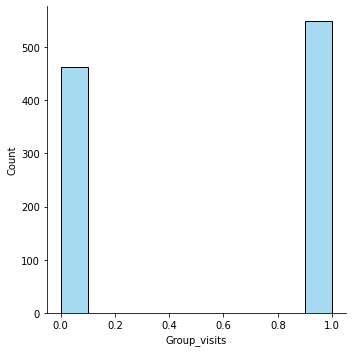

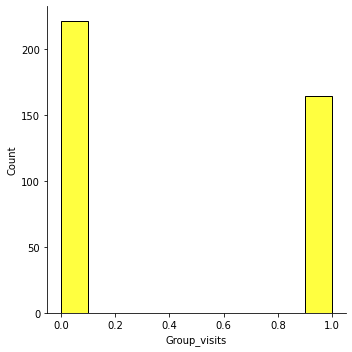

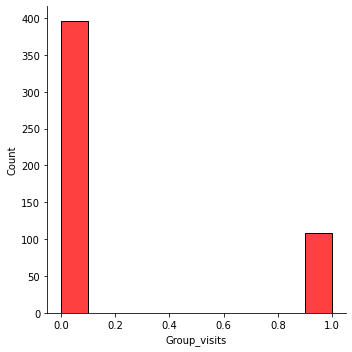

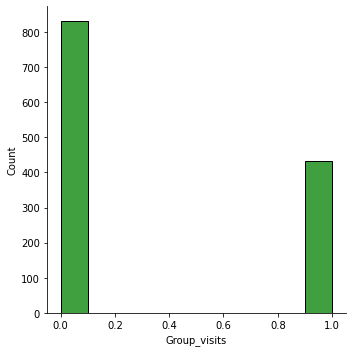

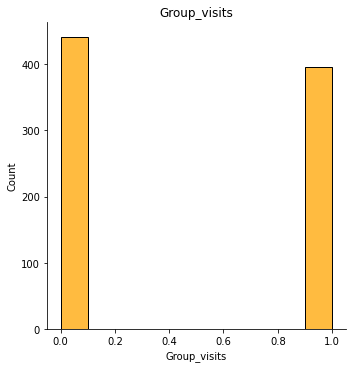

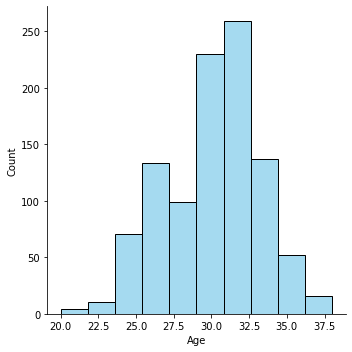

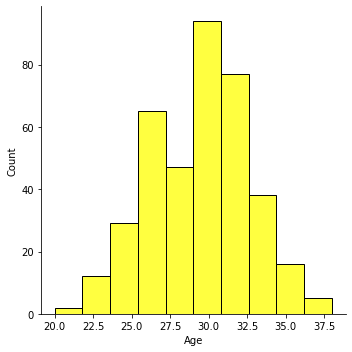

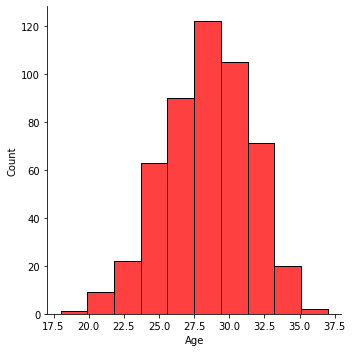

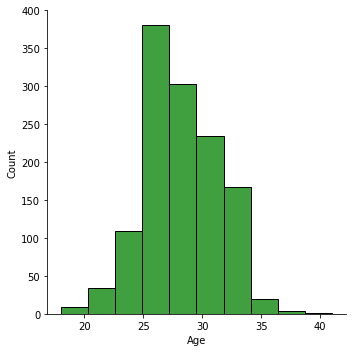

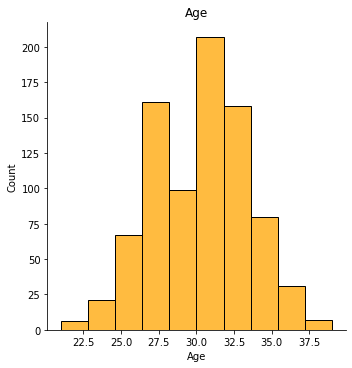

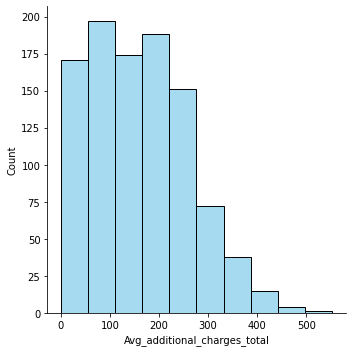

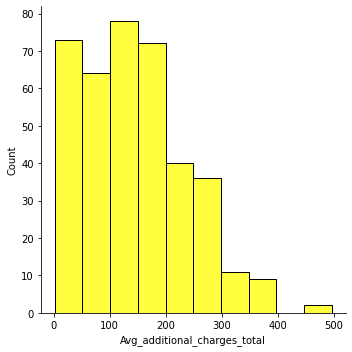

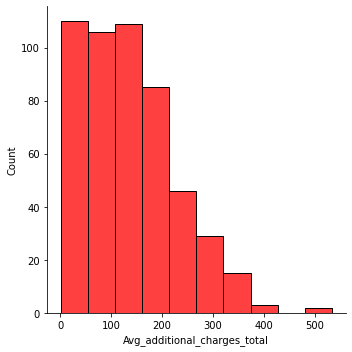

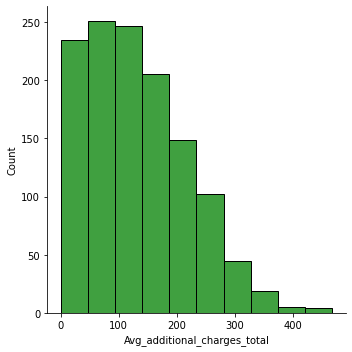

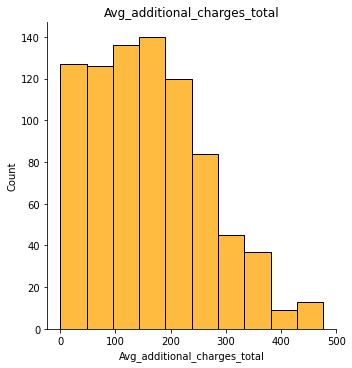

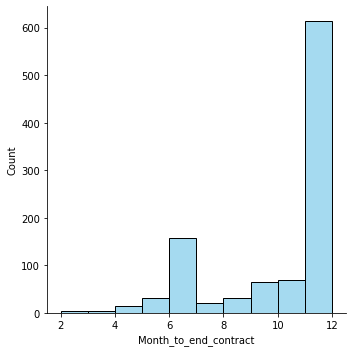

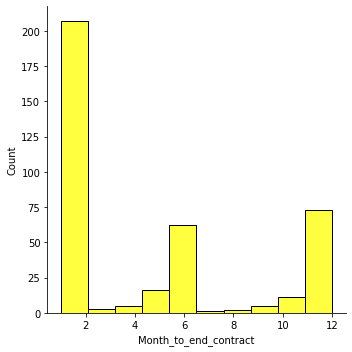

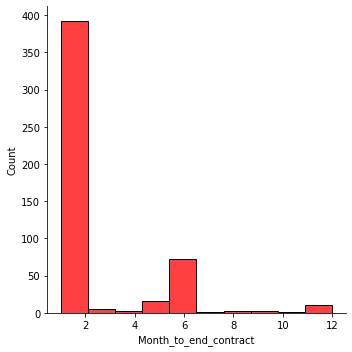

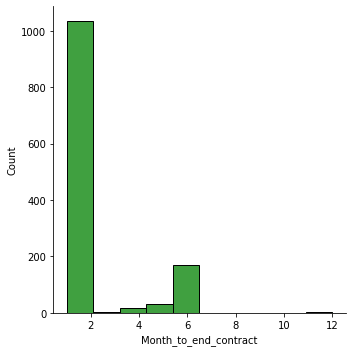

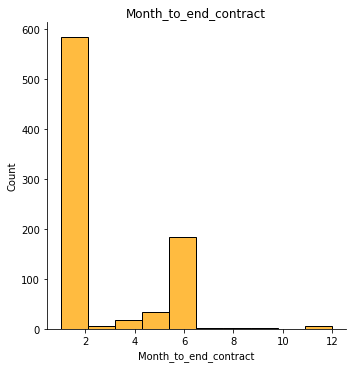

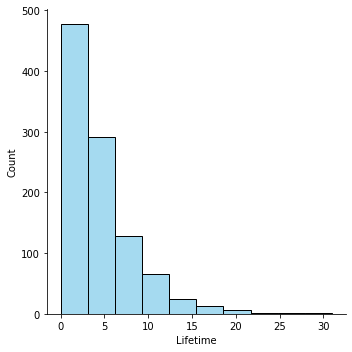

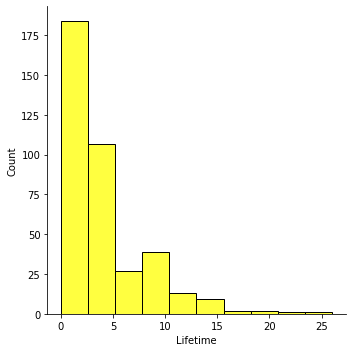

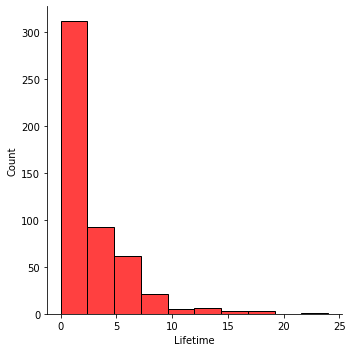

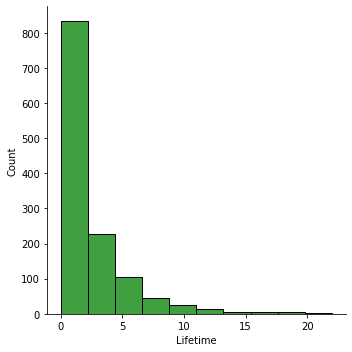

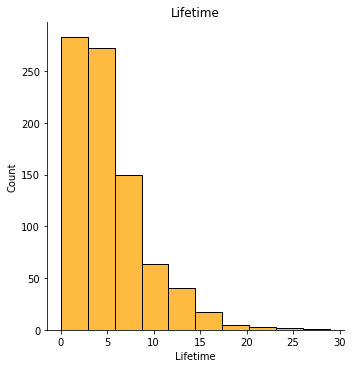

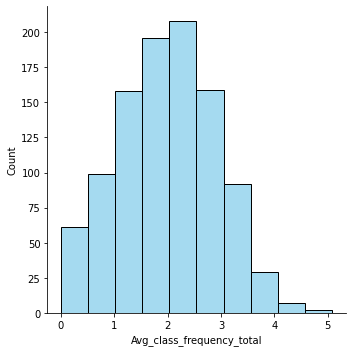

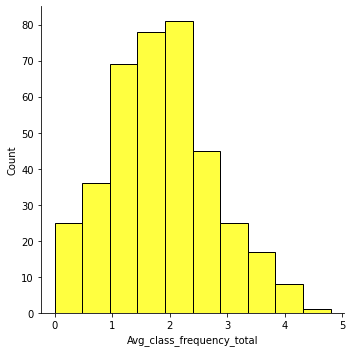

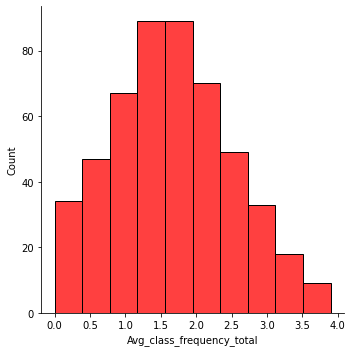

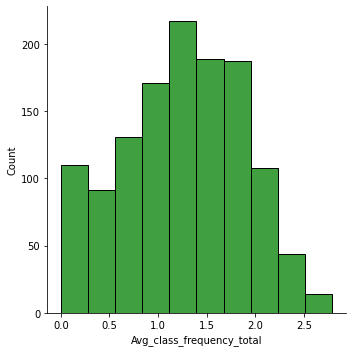

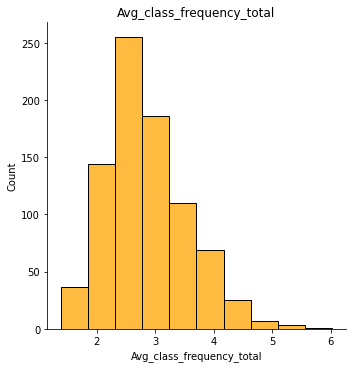

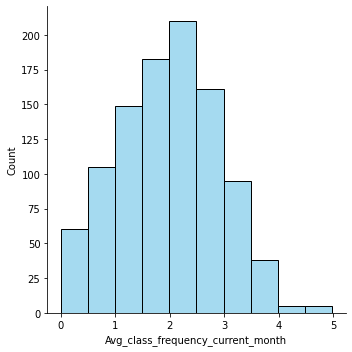

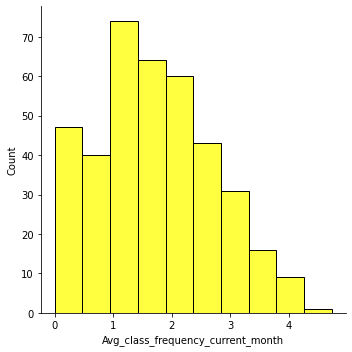

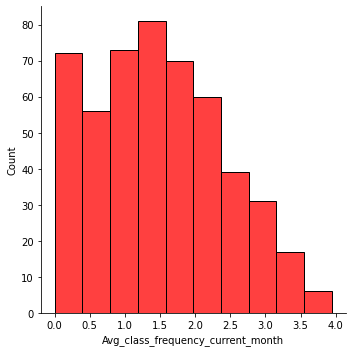

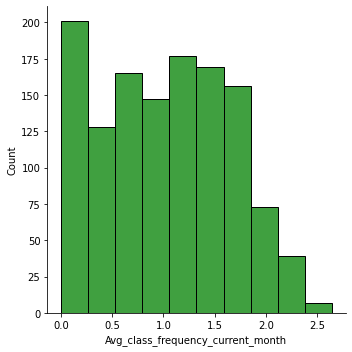

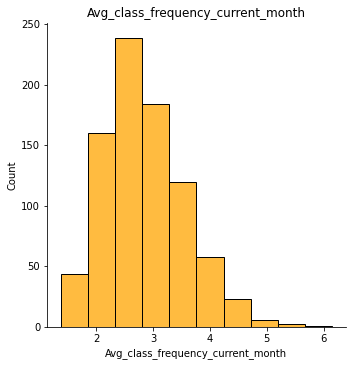

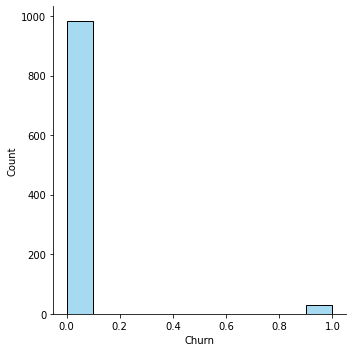

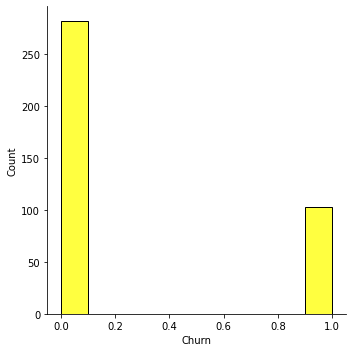

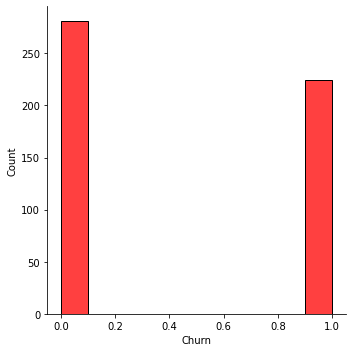

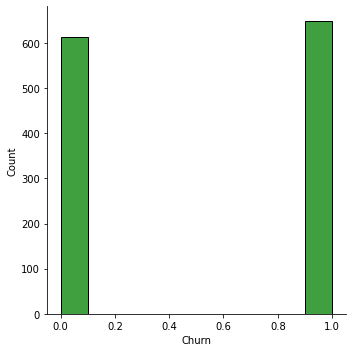

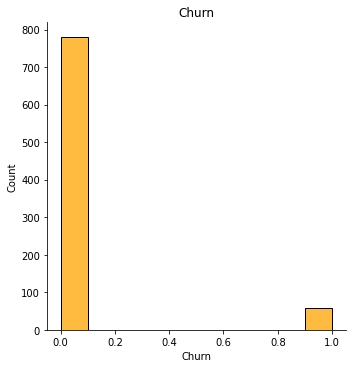

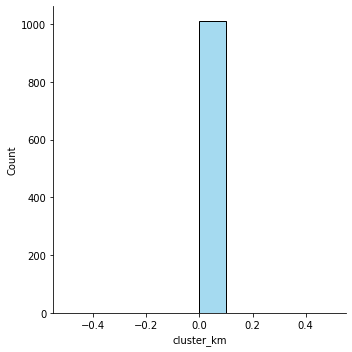

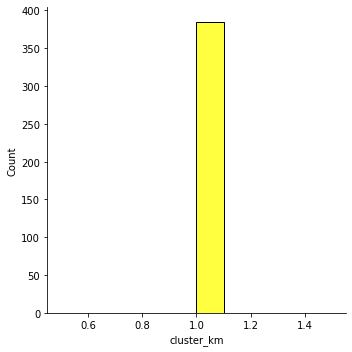

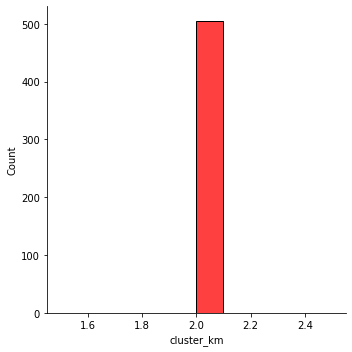

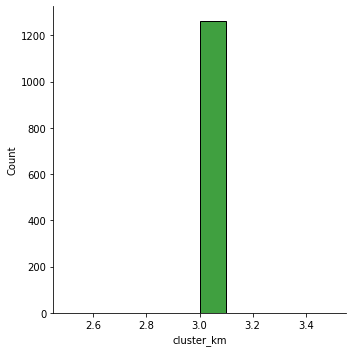

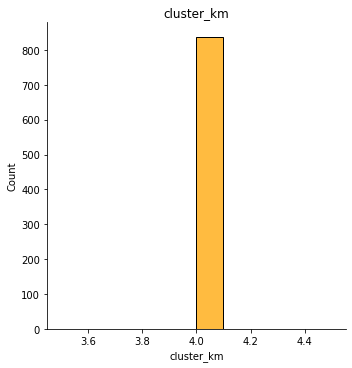

In [52]:
for cluster in gym_churn.columns:
    sns.displot(gym_churn.query('cluster_km == 0')[cluster], bins = 10, color='skyblue', label="0")
    sns.displot(gym_churn.query('cluster_km == 1')[cluster], bins = 10, color='yellow', label="1")
    sns.displot(gym_churn.query('cluster_km == 2')[cluster], bins = 10, color='red', label="2")
    sns.displot(gym_churn.query('cluster_km == 3')[cluster], bins = 10, color='green', label="3")
    sns.displot(gym_churn.query('cluster_km == 4')[cluster], bins = 10, color='orange', label="4")
    plt.title(cluster)
    plt.show()

Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

In [53]:
gym_churn_claster = gym_churn.pivot_table(index = 'cluster_km', columns = 'Churn',  values = 'Age', aggfunc = 'count', margins = True)#.reset_index()
gym_churn_claster['Доля оттока'] =((gym_churn_claster[1] / gym_churn_claster['All'])*100).round(1)
display(gym_churn_claster)

Churn          0     1   All  Доля оттока
cluster_km                               
0           983   28    1011  2.8        
1           282   103   385   26.8       
2           281   224   505   44.4       
3           613   649   1262  51.4       
4           780   57    837   6.8        
All         2939  1061  4000  26.5

#### Выводы NEW:

Самая высокая доля оттока в 3 кластере (51.4%) и 2 кластере(44.4%). Меньше всего из 0го кластера-2.8%. 




### Шаг 5. Выводы и рекомендации

##### Типичные портреты пользователей: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
Во всех кластерах по гендерному признаку одинаковое распределение и возраст 28-30лет.


######  О-кластер 
Расположение ближе к дому важно, пользователи партнерской программы, больше всего пользователей по программе Приведи друга, длительность контракта  среднем 10.88мес, имеют значения групповые визиты, больше тратят на доп.услуги, дольше всего пользуются фитнес-клубом, почти 5 мес. Самый низкий отток 2.8%. Самые надежные пользователи.

###### 1-кластер
Расположение ближе к дому важно, длительность контракта почти 5 мес, не готовы много платить за доп.услуги
###### 2-кластер
Расположение не имеет значение, длительность контракта меньше 3 мес, не готовы много платить за доп.услуги. Не стоит рассчитывать на этот кластер.

###### 3-кластер
Расположение имеет принципиальное значение, пришли не по партнерской программе, длительность контракта меньше 3 мес, не готовы много платить за доп.услуги, меньше всего посещают клуб-1р в неделю. Имеют самую высокую долю оттока 51.4%. Самый не надежный кластер.
###### 4-кластер
Расположение ближе к дому важно, пришли не по партнерской программе, имеют значения групповые визиты, больше тратят на доп.услуги, дольше всего пользуются фитнес-клубом, почти 5 мес, чаще всего посещают клуб-3р в неделю. Тоже имеют низкую долю оттока 6.8%, отнесем  к надежным пользователям.


#### Основные признаки, наиболее сильно влияющие на отток;

1. Near_Location: Не смотря на то, что клуб рядом с домом или работой, в отток попало большее количество таких пользователей (0.77).
2. Promo_friends: в отток попали пользователи, которые пришли не по программе Приведи друга (0.18). 
3. Contract_period:  в оттоке в среднем продолжительность контракта почти 2 мес(1.73), а среди тех кто остался, в основном те, у кого срок действия почти 6 мес. Т.е. люди чаще уходят, бросают  клуб при коротких контрактах.
4. Group_visits: по групповым визитам больше тех, кто не предпочетает групповые программы. А среди тех, кто остался пользователи больше интересуются групповыми занятиями.
5. Avg_additional_charges_total: В отток попали больше пользователи, которые  не хотят тратить денег на доп услуги (115), чем те, которые остались(158).
6. Month_to_end_contract: чаще бросают ходить у кого до окончания контракта 1.66 мес,  а остаются те, у кого  больше 5 мес.
7. Lifetime: бросают чаше после 1мес посещения клуба, а остаются те, кто о пришел-4.5мес.
8. Avg_class_frequency_current_month: больше 2 посещений в неделю попадают в отток чаще, при 1 посещении остаются.
9. Avg_class_frequency_current_month: при 1 посещений в неделю попадают в отток чаще, при 2 посещении остаются.

##### Основные выводы и  рекомендации по повышению качества работы с клиентами:

 
 1. Сосредоточиться на развитии пользователей 0 и 4го кластеров.
 2. Улучшить групповые программы
 3. Скорректировать контракты по сроку 6, 9, 12 мес. Убрать самые короткие программы.
 4. Развивать акцию Приведи друга
 5. Сделать программу лояльности для клиентов, которые чаще пользуются доп.услугами.

 
